In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime, timedelta
from decimal import ROUND_HALF_UP, Decimal

In [2]:
import os

def search(dirname):
    tmp = []
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        tmp.append(full_filename)
    return tmp

In [3]:
name_list = search('D:\kaggle\speed\jpx-tokyo-stock-exchange-prediction')

name_list

['D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\data_specifications',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\example_test_files',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\jpx_tokyo_market_prediction',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\stock_list.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\supplemental_files',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\train_files']

In [4]:
df_stock_list = pd.read_csv('D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\stock_list.csv')
df_stock_list.head(3)

,SecuritiesCode,EffectiveDate,Name,Section/Products,NewMarketSegment,33SectorCode,33SectorName,17SectorCode,17SectorName,NewIndexSeriesSizeCode,NewIndexSeriesSize,TradeDate,Close,IssuedShares,MarketCapitalization,Universe0
0,1301,20211230,"KYOKUYO CO.,LTD.",First Section (Domestic),Prime Market,50,"Fishery, Agriculture and Forestry",1,FOODS,7,TOPIX Small 2,20211230.0,3080.0,1.092828e+07,3.365911e+10,True
1,1305,20211230,Daiwa ETF-TOPIX,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2097.0,3.634636e+09,7.621831e+12,False
2,1306,20211230,NEXT FUNDS TOPIX Exchange Traded Fund,ETFs/ ETNs,NaN,-,-,-,-,-,-,20211230.0,2073.5,7.917718e+09,1.641739e+13,False


In [5]:
folder_list = []
for name in name_list:
    if name.find('csv') == -1:
        folder_list.append(name)
folder_list
        

['D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\data_specifications',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\example_test_files',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\jpx_tokyo_market_prediction',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\supplemental_files',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\train_files']

In [6]:
#data_specifications 폴더
search(folder_list[0])

['D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\data_specifications\\options_spec.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\data_specifications\\stock_fin_spec.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\data_specifications\\stock_list_spec.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\data_specifications\\stock_price_spec.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\data_specifications\\trades_spec.csv']

In [7]:
#example_test_files 폴더
search(folder_list[1])

['D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\example_test_files\\financials.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\example_test_files\\options.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\example_test_files\\sample_submission.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\example_test_files\\secondary_stock_prices.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\example_test_files\\stock_prices.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\example_test_files\\trades.csv']

In [8]:
#jpx_tokyo_market_prediction 폴더
search(folder_list[2])

['D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\jpx_tokyo_market_prediction\\competition.cpython-37m-x86_64-linux-gnu.so',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\jpx_tokyo_market_prediction\\__init__.py']

In [9]:
#supplemental_files 폴더
search(folder_list[3])

['D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\supplemental_files\\financials.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\supplemental_files\\options.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\supplemental_files\\secondary_stock_prices.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\supplemental_files\\stock_prices.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\supplemental_files\\trades.csv']

In [10]:
#train_files 폴더
search(folder_list[4])

['D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\train_files\\financials.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\train_files\\options.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\train_files\\secondary_stock_prices.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\train_files\\stock_prices.csv',
 'D:\\kaggle\\speed\\jpx-tokyo-stock-exchange-prediction\\train_files\\trades.csv']

In [11]:
################ 폴더 정보 ##########################

# data_specifications : 컬럼명 정의
# example_test_files : 오프라인 테스트를 용이하게 한 것으로 API를 이용...
# jpx_tokyo_market_prediction : API인데...쓰는건 일단 보류
# supplemental_files : 동적 폴더라는데 주기적으로 데이터가 바뀌는 것으로 보임
# train_files : 학습 데이터

In [12]:

################ csv 파일 정보 ######################

# financial.csv : 분기별 수익 보고서(재무재표 같은 거)
# options.csv : 넓은 시장을 기반으로 한 옵션 상태, 옵션은 주식의 미래 가격에 대한 암묵적인 예측이 포함되어 있으므로 옵션이 직접 타겟에 영향을 주지 않더라도 흥미로운 정보가 될 수 있다
# second_stock_prices : stock prices에는 가장 일반적으로 거래되는 2000개의 주식이 포함되어 있으나 해당 파일에는 유동성이 적은 주식들이 포함되어있음. 이 파일은 타겟을 평가하는데 직접적인 영향을 주지는 않지만 시장에 간접적으로 영향을 줄 수 있기 때문에 제공된 파일
# stock_prices.csv : 각 종목별 일일종가 및 타겟 컬럼
# trades.csv : 이전 영업 주간의 거래량을 집계한 파일


In [13]:
train_files = search(folder_list[4])

#df_train_financial = pd.read_csv(train_files[0])
#df_train_option = pd.read_csv(train_files[1])
#df_train_second = pd.read_csv(train_files[2])
df_train_stock = pd.read_csv(train_files[3]) 
#df_train_trades = pd.read_csv(train_files[4])

In [14]:
df_train_stock.loc[:, 'Date'] = pd.to_datetime(df_train_stock.loc[: ,"Date"], format="%Y-%m-%d")

In [15]:
len(df_train_stock)

2332531

In [16]:
df_train_stock = df_train_stock.sort_values(by=['Date'], ascending=True).reset_index(drop=True)
df_train_stock['Date'].max() - df_train_stock['Date'].min()
df_train_stock.drop('RowId', axis=1, inplace=True)

In [17]:
df_train_stock['Date'].max() - df_train_stock['Date'].min()

Timedelta('1794 days 00:00:00')

In [18]:
df_train_stock['Date'].min(), df_train_stock['Date'].max()

(Timestamp('2017-01-04 00:00:00'), Timestamp('2021-12-03 00:00:00'))

In [19]:
df_train_stock

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730
1,2017-01-04,7412,719.0,725.0,719.0,721.0,201400,1.0,NaN,False,0.000000
2,2017-01-04,7408,2459.0,2518.0,2447.0,2500.0,110900,1.0,NaN,False,0.004421
3,2017-01-04,7315,465.0,494.0,465.0,493.0,41100,1.0,NaN,False,-0.004032
4,2017-01-04,7313,3055.0,3150.0,3045.0,3135.0,248600,1.0,NaN,False,-0.009693
...,...,...,...,...,...,...,...,...,...,...,...
2332526,2021-12-03,4490,5330.0,5520.0,5240.0,5520.0,85700,1.0,NaN,False,0.094961
2332527,2021-12-03,4488,6400.0,6700.0,6300.0,6700.0,52200,1.0,NaN,False,-0.011688
2332528,2021-12-03,4485,10580.0,10750.0,9780.0,10230.0,572400,1.0,NaN,False,0.044966
2332529,2021-12-03,4523,6800.0,6945.0,6762.0,6945.0,1134600,1.0,NaN,False,0.004962


In [20]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_train_stock, title="data set", html={'style' : {'full_width':True}})
# profile

In [21]:
index = df_train_stock[df_train_stock['High'].isna() == True].index
index

Int64Index([    664,    1141,    3005,    3636,    4870,    6218,    6236,
               6630,    6666,    6735,
            ...
            2328469, 2329255, 2329616, 2329642, 2329832, 2331129, 2331253,
            2331614, 2331900, 2332262],
           dtype='int64', length=7608)

In [22]:
df_train_stock.drop(index, inplace=True)

In [23]:
df_train_stock[df_train_stock['SecuritiesCode'] == 3540].head(50)

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target
444049,2017-12-15,3540,2050.0,2050.0,2050.0,2050.0,700,1.0,NaN,True,0.162255
445938,2017-12-18,3540,4030.0,4630.0,4010.0,4345.0,1559200,1.0,NaN,True,-0.065347
447828,2017-12-19,3540,4300.0,5050.0,4265.0,5050.0,799200,1.0,NaN,True,0.042373
449721,2017-12-20,3540,5250.0,5330.0,4430.0,4720.0,1152200,1.0,NaN,True,0.036585
451615,2017-12-21,3540,4850.0,5200.0,4730.0,4920.0,344300,1.0,NaN,True,-0.027451
453509,2017-12-22,3540,5130.0,5170.0,4865.0,5100.0,295800,1.0,NaN,True,-0.067540
455403,2017-12-25,3540,5200.0,5220.0,4900.0,4960.0,112900,1.0,12.8,True,0.063784
457299,2017-12-26,3540,4900.0,5000.0,4615.0,4625.0,101500,1.0,NaN,True,-0.014228
459195,2017-12-27,3540,4705.0,4960.0,4705.0,4920.0,82700,1.0,NaN,True,0.000000
461091,2017-12-28,3540,5100.0,5140.0,4720.0,4850.0,155700,1.0,NaN,True,0.002062


In [24]:
def adjust_price(price):
    '''
    액면 분할할 경우 조정계수가 1미만으로 나온다.
    '''
    def generate_adjusted_close(df):
        
        # sort data to generate CumulativeAdjustmentFactor
        df = df.sort_values("Date", ascending=False)
        # generate CumulativeAdjustmentFactor
        df.loc[:, "CumulativeAdjustmentFactor"] = df["AdjustmentFactor"].cumprod()
        # generate AdjustedClose
        
        df.loc[:, "AdjustedOpen"] = (
            df["CumulativeAdjustmentFactor"] * df["Open"]
        ).map(lambda x: float(
            Decimal(str(x)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
        ))
        
        df.loc[:, "AdjustedClose"] = (
            df["CumulativeAdjustmentFactor"] * df["Close"]
        ).map(lambda x: float(
            Decimal(str(x)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
        ))
        
        df.loc[:, "AdjustedHigh"] = (
            df["CumulativeAdjustmentFactor"] * df["High"]
        ).map(lambda x: float(
            Decimal(str(x)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
        ))
        
        df.loc[:, "AdjustedLow"] = (
            df["CumulativeAdjustmentFactor"] * df["Low"]
        ).map(lambda x: float(
            Decimal(str(x)).quantize(Decimal('0.1'), rounding=ROUND_HALF_UP)
        ))
        
        # reverse order
        df = df.sort_values("Date")
        # to fill AdjustedClose, replace 0 into np.nan
        df.loc[df["AdjustedClose"] == 0, "AdjustedClose"] = np.nan
        # forward fill AdjustedClose
        df.loc[:, "AdjustedClose"] = df.loc[:, "AdjustedClose"].ffill()
        return df

    # generate AdjustedClose
    price = price.sort_values(["SecuritiesCode", "Date"])
    price = price.groupby("SecuritiesCode").apply(generate_adjusted_close).reset_index(drop=True)

    #price.set_index("Date", inplace=True)
    return price

In [25]:
df_train_stock = adjust_price(df_train_stock)

In [26]:
df_train_stock.head()

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,CumulativeAdjustmentFactor,AdjustedOpen,AdjustedClose,AdjustedHigh,AdjustedLow
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,1.0,2734.0,2742.0,2755.0,2730.0
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,0.002920,1.0,2743.0,2738.0,2747.0,2735.0
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,-0.001092,1.0,2734.0,2740.0,2744.0,2720.0
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,-0.005100,1.0,2745.0,2748.0,2754.0,2735.0
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,-0.003295,1.0,2748.0,2745.0,2752.0,2737.0


In [27]:
df_train_stock[df_train_stock['SecuritiesCode']==4443]

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,CumulativeAdjustmentFactor,AdjustedOpen,AdjustedClose,AdjustedHigh,AdjustedLow
740749,2019-06-19,4443,4760.0,5460.0,4730.0,5460.0,7035500,1.0,NaN,False,0.021938,0.25,1190.0,1365.0,1365.0,1182.5
740750,2019-06-20,4443,5660.0,5890.0,5330.0,5470.0,3099200,1.0,NaN,False,-0.021467,0.25,1415.0,1367.5,1472.5,1332.5
740751,2019-06-21,4443,5670.0,5790.0,5500.0,5590.0,1546900,1.0,NaN,False,-0.010969,0.25,1417.5,1397.5,1447.5,1375.0
740752,2019-06-24,4443,5560.0,5770.0,5270.0,5470.0,875600,1.0,NaN,False,-0.014787,0.25,1390.0,1367.5,1442.5,1317.5
740753,2019-06-25,4443,5380.0,5450.0,5160.0,5410.0,490300,1.0,NaN,False,0.020638,0.25,1345.0,1352.5,1362.5,1290.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741344,2021-11-29,4443,3200.0,3270.0,3075.0,3085.0,635600,1.0,NaN,False,-0.067093,1.00,3200.0,3085.0,3270.0,3075.0
741345,2021-11-30,4443,3190.0,3265.0,3105.0,3130.0,967400,1.0,NaN,False,-0.042808,1.00,3190.0,3130.0,3265.0,3105.0
741346,2021-12-01,4443,3075.0,3085.0,2909.0,2920.0,716700,1.0,NaN,False,0.005725,1.00,3075.0,2920.0,3085.0,2909.0
741347,2021-12-02,4443,2836.0,2877.0,2765.0,2795.0,940800,1.0,NaN,False,-0.049093,1.00,2836.0,2795.0,2877.0,2765.0


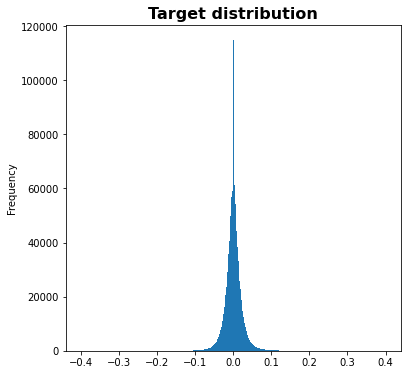

In [28]:
df_train_stock['Target'].plot(kind='hist', bins=800,range=[-0.4,0.4], figsize=(6, 6));
plt.title("Target distribution", weight='bold', fontsize=16);

In [29]:
!pip install --upgrade ta

Requirement already up-to-date: ta in c:\users\kbh\anaconda3\lib\site-packages (0.10.1)


In [30]:
import ta
from tqdm import tqdm
## ta : 기술적분석 라이브러리
## tqdm : 반복문 진행률 표시


def add_ta(df, code):
    
    df_code = df.loc[df["SecuritiesCode"] == code].copy()
    
    
    
    df_added_ta = ta.add_all_ta_features(df_code, "AdjustedOpen", "AdjustedHigh", "AdjustedLow", "AdjustedClose", "Volume", fillna=False)
    
    #f_added_ta = df_added_ta.fillna(0)
    
    #df_added_ta = df_added_ta.replace([np.inf, -np.inf], None)
    #df_added_ta = df_added_ta.fillna(method='bfill')
    
    # 필요하면 여기에 simple imputer 사용
    
    return df_added_ta 

In [31]:
codes = df_train_stock['SecuritiesCode'].unique()
list_ta = []

for code in tqdm(codes):
    tmp = add_ta(df_train_stock, code)
    list_ta.append(tmp)


  0%|                                                                                                            | 0/2000 [00:00<?, ?it/s]C:\Users\KBH\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\KBH\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [18:56<00:00,  1.76it/s]


In [32]:
len(list_ta)

2000

In [37]:
df_train_stock_TA = pd.concat(list_ta)

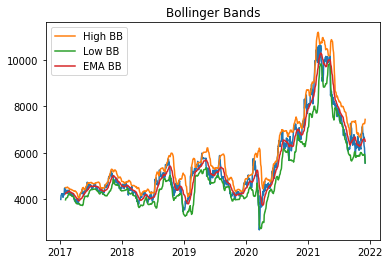

In [34]:
import matplotlib.pyplot as plt

## 7974 닌텐도
## 6758 소니
## 7203 토요타
## 9984 소프트뱅크

df_softbank = df_train_stock_TA[df_train_stock_TA['SecuritiesCode'] == 9984]
df_softbank.fillna(method='bfill')

plt.plot(df_softbank.Date, df_softbank.AdjustedClose)
plt.plot(df_softbank.Date, df_softbank.volatility_bbh, label='High BB')
plt.plot(df_softbank.Date, df_softbank.volatility_bbl, label='Low BB')
plt.plot(df_softbank.Date, df_softbank.volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [35]:
#df_softbank.fillna(method='bfill')

In [36]:
tmp = df_train_stock_TA[df_train_stock_TA['SecuritiesCode'] == 1435]
tmp[tmp['Date'] > datetime(2017, 12, 20)].iloc[:10, :20]

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,CumulativeAdjustmentFactor,AdjustedOpen,AdjustedClose,AdjustedHigh,AdjustedLow,volume_adi,volume_obv,volume_cmf,volume_fi
16695,2017-12-21,1435,8180.0,8410.0,8080.0,8190.0,273400,1.0,NaN,False,0.045455,0.2,1636.0,1638.0,1682.0,1616.0,5.729654e+05,4322400,0.075591,9.486571e+06
16696,2017-12-22,1435,8300.0,8370.0,8210.0,8360.0,168900,1.0,NaN,False,-0.029748,0.2,1660.0,1672.0,1674.0,1642.0,7.207529e+05,4491300,0.095306,8.951718e+06
16697,2017-12-25,1435,8450.0,8790.0,8420.0,8740.0,252200,1.0,20.0,False,-0.000590,0.2,1690.0,1748.0,1758.0,1684.0,9.047907e+05,4743500,0.120457,1.041107e+07
16698,2017-12-26,1435,8860.0,9190.0,8340.0,8480.0,322400,0.2,NaN,False,0.016519,0.2,1772.0,1696.0,1838.0,1668.0,6.885931e+05,4421100,0.008769,6.528805e+06
16699,2017-12-27,1435,1672.0,1750.0,1655.0,1695.0,662700,1.0,NaN,False,-0.028439,1.0,1672.0,1695.0,1750.0,1655.0,5.839562e+05,3758400,-0.046965,5.501447e+06
16700,2017-12-28,1435,1671.0,1728.0,1627.0,1723.0,614500,1.0,NaN,False,-0.054958,1.0,1671.0,1723.0,1728.0,1627.0,1.137615e+06,4372900,0.050352,7.173526e+06
16701,2017-12-29,1435,1715.0,1715.0,1660.0,1674.0,308400,1.0,NaN,False,-0.049937,1.0,1715.0,1674.0,1715.0,1660.0,9.862183e+05,4064500,0.014002,3.989937e+06
16702,2018-01-04,1435,1671.0,1674.0,1567.0,1582.0,844500,1.0,NaN,False,0.023952,1.0,1671.0,1582.0,1674.0,1567.0,3.784940e+05,3220000,-0.070604,-7.679197e+06
16703,2018-01-05,1435,1597.0,1599.0,1483.0,1503.0,2272600,1.0,NaN,False,0.070825,1.0,1597.0,1503.0,1599.0,1483.0,-1.110451e+06,947400,-0.247495,-3.223008e+07
16704,2018-01-09,1435,1500.0,1555.0,1493.0,1539.0,756500,1.0,NaN,False,-0.027306,1.0,1500.0,1539.0,1555.0,1493.0,-7.444025e+05,1703900,-0.192052,-2.373521e+07


In [37]:
# 컬럼 설명
# 그리 어렵지 않아 특이한 것만


############# option 파일 ############
# option 파일에는 시가 종가가 없다

# OpenInterest : 미결제 약정 -> 옵션을 정리하지 않은 수 
# 미결제 약정이 줄어든다 = 사람들이 쫄아서 역추세가 나올거라 생각한다.
# 미결제 약정이 늘어난다 = 사람들이 현추세로 이어나갈거라 생각한다.
# 미결제 약정의 수가 중요하기보다는 미결제 약정의 변화량이 중요하다고 생각함.

# strikePrice : 약정 가격 
# 옵션 만기일에 지불할 가격

# contractMonth : 옵션 체결한 달

# TradingVolume, JPX JNet 차이 : 전자는 J-NET Trading Volume 가 있고 후자는 없음.
# 풋,콜 : 공매도(롱,숏) 선물(콜,풋) 

# Quotation : 호가
# SpecialQuotation : 일반적으로 선물은 X주에 하는데 해당 주기를 벗어난 것
# SpecialQuotationDay : 

# SettlementPrice 대차가격 : 대차거래에 있어서 증권회사가 증권금융회사로부터 대부받을 수 있는 1주당의 표준가격을 말한다.(잘 모르겠다)
# securities = 증권회사

# TheoreticalPrice : 오늘의 마지막 옵션 가치 
# BaseVolatility : 가격 변동률
# ImpliedVolatility : 내재변동성
# interest rate : 이자율
# DividendRate : 배당율
# Dividend : 배당금





############## finance 파일 #########
# 재무재표가 1분기, 2분기, 3분기, 전체(fiscal)로 나눠져있음. 경우에 따라서 4, 5분기도 있는데 이는 회사가 fiscal year를 12달보다 크게 잡은 경우
# 순매출액 Net Sales
# 총매출액 gross sales
# OperatingProfit(영업이익): 순매출액에서 영업이용을 뺸 금액 은행 또는 보험이 일본 표준이 적용될 경우 블랭크
# OrdinalyProfit : 영업이익에 영업외수익(이자수익, 배당 등)을 더한 금액에서 영업외비용(이자, 증권매각손실)을 뺸 금액
# Earnings Per Share (EPS) : 주당 순이익
# Book-value Per Share (BPS) : 주당 순자산
# DPS : 주당 배당금

############# stock list ###########
# securities code : 거래소 코드


############ trade #################


In [38]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_train_financial, title="data set", html={'style' : {'full_width':True}})
# profile

In [39]:
!pip install --upgrade lightgbm

Requirement already up-to-date: lightgbm in c:\users\kbh\anaconda3\lib\site-packages (3.3.2)


In [40]:
!pip install --upgrade sklearn

Requirement already up-to-date: sklearn in c:\users\kbh\anaconda3\lib\site-packages (0.0)


In [41]:
df_train_stock_TA

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.033456,NaN,0.000000
1,2017-01-05,1301,2743.0,2747.0,2735.0,2738.0,17900,1.0,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.145879,-0.145985,-0.145879
2,2017-01-06,1301,2734.0,2744.0,2720.0,2740.0,19900,1.0,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073046,0.073019,-0.072939
3,2017-01-10,1301,2745.0,2754.0,2735.0,2748.0,24200,1.0,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.291971,0.291545,0.218818
4,2017-01-11,1301,2748.0,2752.0,2737.0,2745.0,9300,1.0,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.109170,-0.109230,0.109409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324918,2021-11-29,9997,678.0,679.0,665.0,668.0,320800,1.0,NaN,False,...,-4.249737,-3.537326,-0.712411,0.192755,-2.140187,2.332943,696.379316,-2.906977,-2.950066,-14.138817
2324919,2021-11-30,9997,670.0,689.0,667.0,667.0,296300,1.0,NaN,False,...,-4.488859,-3.727633,-0.761226,1.551434,-1.401863,2.953297,686.217265,-0.149701,-0.149813,-14.267352
2324920,2021-12-01,9997,661.0,688.0,660.0,685.0,339100,1.0,NaN,False,...,-4.429590,-3.868024,-0.561566,3.844718,-0.352547,4.197265,686.060220,2.698651,2.662879,-11.953728
2324921,2021-12-02,9997,681.0,692.0,680.0,684.0,342900,1.0,NaN,False,...,-4.346809,-3.963781,-0.383028,5.612814,0.840525,4.772289,685.744007,-0.145985,-0.146092,-12.082262


In [42]:
df_train_stock['Date'].max() , df_train_stock['Date'].min()

(Timestamp('2021-12-03 00:00:00'), Timestamp('2017-01-04 00:00:00'))

In [43]:
(df_train_stock['Date'].max() - df_train_stock['Date'].min())

Timedelta('1794 days 00:00:00')

In [44]:
df_train_stock = df_train_stock.sort_values(by='Date')

In [45]:
df_train_stock['Date'].dt.year.unique()

array([2017, 2018, 2019, 2020, 2021], dtype=int64)

In [46]:
#df_train_stock['Date'].dt.month.unique()
#df_train_stock.iloc[-1,:].['Date']

In [47]:
df_train_stock['Date'].dt.year# ==  end_datetime.year
end_datetime = datetime(2017, 9 , 1)
end_datetime.year

2017

In [48]:
stride = []

for i in range(len(df_train_stock['Date'].dt.year.unique())):
    if i == (len(df_train_stock['Date'].dt.year.unique())) -1 :
        stride.append(9)
    else:
        stride.append(12 - i*3)


stride.reverse()

stride

[9, 3, 6, 9, 12]

In [49]:
df_train_stock

,Date,SecuritiesCode,Open,High,Low,Close,Volume,AdjustmentFactor,ExpectedDividend,SupervisionFlag,Target,CumulativeAdjustmentFactor,AdjustedOpen,AdjustedClose,AdjustedHigh,AdjustedLow
0,2017-01-04,1301,2734.0,2755.0,2730.0,2742.0,31400,1.0,NaN,False,0.000730,1.0,2734.0,2742.0,2755.0,2730.0
1551318,2017-01-04,7278,3295.0,3380.0,3255.0,3380.0,140300,1.0,NaN,False,-0.019345,1.0,3295.0,3380.0,3380.0,3255.0
1550117,2017-01-04,7276,6290.0,6390.0,6260.0,6350.0,540900,1.0,NaN,False,0.003205,1.0,6290.0,6350.0,6390.0,6260.0
1548916,2017-01-04,7272,2600.0,2642.0,2578.0,2637.0,3023600,1.0,NaN,False,-0.037291,1.0,2600.0,2637.0,2642.0,2578.0
1547715,2017-01-04,7270,4900.0,5006.0,4893.0,4991.0,5826000,1.0,NaN,False,-0.006444,1.0,4900.0,4991.0,5006.0,4893.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2128756,2021-12-03,9310,566.0,589.0,566.0,587.0,43200,1.0,NaN,False,0.038721,1.0,566.0,587.0,589.0,566.0
1850689,2021-12-03,8168,810.0,822.0,808.0,820.0,110900,1.0,NaN,False,0.018160,1.0,810.0,820.0,822.0,808.0
1547714,2021-12-03,7269,4584.0,4611.0,4502.0,4603.0,1190700,1.0,NaN,False,0.039251,1.0,4584.0,4603.0,4611.0,4502.0
2241500,2021-12-03,9728,2718.0,2784.0,2718.0,2784.0,26200,1.0,NaN,False,0.021377,1.0,2718.0,2784.0,2784.0,2718.0


In [61]:
class myTimeSeriesSplit():
    """Generate indices to split data into training and test set.
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Training data, where `n_samples` is the number of samples
        and `n_features` is the number of features.
    y : array-like of shape (n_samples,)
        Always ignored, exists for compatibility.
    groups : array-like of shape (n_samples,)
        Always ignored, exists for compatibility.
    Yields
    ------
    train : ndarray
        The training set indices for that split.
    test : ndarray
        The testing set indices for that split.
    """
    df = pd.DataFrame()
    tmp = pd.DataFrame()
    def __init__(self):
        pass
    def get_n_splits(self, X, y, groups):
        
        tmp['Date'] = pd.to_datetime(X['Date'], format='%Y%m%d')
        
        years = tmp['Date'].dt.year.unique()
       
        n_splits = len(years)     # 기본 데이터로는 17~21년 까지 총 5년
        
        
        return n_splits
    
    def split(self,  df,  y=None, groups=None):
        self.df = df
        #n_splits = self.n_splits
        #n_folds = n_splits + 1
        
        tmp = pd.DataFrame()
        tmp['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
        
        
        years = tmp['Date'].dt.year.unique() # 
        dates_each_year = []
        last_month = tmp.iloc[-1, :]['Date'].month


        n_splits = len(years)     # 기본 데이터로는 17~21년 까지 총 5년
        n_folds = n_splits + 1

        stride = []
        for i in range(len(years)):
            if i == (len(years)) -1 :
                stride.append(9)
            else:
                stride.append(last_month - i*3)
        stride.reverse()

        months = tmp['Date'].dt.month.unique()
        date_on_year = []
        
        tmp_i = 0
        
        start_year = years[0]
        end_year = years[0]

        start_month = 1
        
        
        end_datetime = datetime(years[0], 9 , 1)
        
        start_index = 0 
        
        indices = np.arange(len(tmp))
        
        while 1:
            
            cond_1 = tmp['Date'].dt.year ==  end_datetime.year
            cond_2 = tmp['Date'].dt.month ==  end_datetime.month
            
            train_len = len(tmp[tmp['Date'] <  end_datetime])
            test_len = len(tmp[cond_1 & cond_2])
            
            yield (
                indices[:train_len],
                indices[train_len:train_len+test_len+1]
            )
            
            
            
            
            
            if end_datetime.year == years[0]:
                next_month = int((end_datetime.month+3)%12)
            else:
                next_month = int((end_datetime.month+3)%12)
            
            if next_month == 0:
                next_month = 12
            
            print("[fold range]",tmp.iloc[0, :]['Date'].month, tmp.iloc[0, :]['Date'].year, ' ~ ',end_datetime.month , end_datetime.year)
            print('==================================================')
            print()
            print()
            
            if (end_datetime.month <= tmp.iloc[-1, :]['Date'].month) & (end_datetime.year == tmp.iloc[-1, :]['Date'].year):
                break
                
            end_datetime = datetime(end_datetime.year+1,next_month , 1)
           
            
            
        
tscv = myTimeSeriesSplit()            
#tscv.split(df_train_stock_TA)

X = np.random.randn(100, 10)
for fold, (train_index, test_index) in enumerate(tscv.split(df_train_stock_TA)):
    print("Fold: {}".format(fold))
    print("TRAIN indices:", train_index[0], train_index[-1], "\n", "TEST indices:", test_index[0], test_index[-1])
    print("\n")
tmp2 = tscv.split(df_train_stock_TA)
#tscv.get_n_splits()
#print(tmp2)

Fold: 0
TRAIN indices: 0 308205 
 TEST indices: 308206 345734


[fold range] 1 2017  ~  9 2017


Fold: 1
TRAIN indices: 0 892726 
 TEST indices: 892727 929239


[fold range] 1 2017  ~  12 2018


Fold: 2
TRAIN indices: 0 1002348 
 TEST indices: 1002349 1040939


[fold range] 1 2017  ~  3 2019


Fold: 3
TRAIN indices: 0 1587064 
 TEST indices: 1587065 1630360


[fold range] 1 2017  ~  6 2020


Fold: 4
TRAIN indices: 0 2197285 
 TEST indices: 2197286 2237208


[fold range] 1 2017  ~  9 2021




In [51]:
!pip install category_encoders

In [72]:
from lightgbm import LGBMRegressor
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint, uniform
 
# pipe = make_pipeline(
#     SimpleImputer(),
#     StandardScaler()
# )

pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    TargetEncoder(),
    LGBMRegressor()
)


dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.],# int로 넣으면 error(bug) 
    'targetencoder__min_samples_leaf': randint(1, 10), # randint 로 범위를 지정
    'simpleimputer__strategy': ['mean', 'median'],
    'lgbmregressor__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 600, num = 41)],
    'lgbmregressor__max_depth': [int(x) for x in np.linspace(200, 500, num = 41)],
    #'lgbmclassifier__num_leaves': [int(x) for x in np.linspace(2, 1000, num = 31)],
    #'lgbmclassifier__min_child_samples': [int(x) for x in np.linspace(1, 100, num = 11)],
    #'lgbmclassifier__learning_rate ': [float(x) for x in np.linspace(0.000001, 0.5, num = 41)],
    'lgbmregressor__learning_rate': [0.0001,0.0005, 0.001,0.005, 0.01,0.05, 0.1]
}
pipe.get_params()

{'memory': None,
 'steps': [('simpleimputer',
   SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                 missing_values=nan, strategy='mean', verbose=0)),
  ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('targetencoder',
   TargetEncoder(cols=None, drop_invariant=False, handle_missing='value',
                 handle_unknown='value', min_samples_leaf=1, return_df=True,
                 smoothing=1.0, verbose=0)),
  ('lgbmregressor',
   LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                 importance_type='split', learning_rate=0.1, max_depth=-1,
                 min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                 n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                 random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
                 subsample=1.0, subsample_for_bin=200000, subsample_freq=0))],
 'verbose': False,
 'simpleim

In [40]:
def dt2int(X):
    return int(X.year*10000) + int(X.month)*100 + int(X.day)


def drop_columns(df):
    
    
    
    X = df.drop(['Target'], axis=1)
    y = df[['Target']]
    
    X['Date'] = X['Date'].apply(dt2int)
    
    return X, y
    


X_train, y_train = drop_columns(df_train_stock_TA)



# X_train = X_train.replace([np.inf, -np.inf], 0)
# X_train = X_train.fillna(method='bfill')
# X_train = X_train.fillna(0)
# X_train.isna().sum()

In [42]:
import sys
X_train.isna().sum()
np.set_printoptions(threshold=sys.maxsize)
#print(np.array(X_train.columns))


X_train_dropped = (X_train[['Date',
'SecuritiesCode',
'Volume',
'AdjustmentFactor',
'ExpectedDividend',
'SupervisionFlag',
'AdjustedOpen',
'AdjustedClose',
'AdjustedHigh',
'AdjustedLow',
'volume_obv',   # 거래량지표1
'volume_adi' ,  # 거래량지표2
'momentum_stoch_rsi', #모멘텀지표
'momentum_wr',      #모멘텀지표
'trend_macd',      # 주세지표
'volatility_bbm' , #유동성지표
'volatility_bbh',
'volatility_bbl'
]])
X_train_dropped.head()

tmp2 =  pd.concat([X_train_dropped, y_train], axis = 1)



In [45]:
tmp2.to_csv('data.csv')


In [152]:

tmp = pd.read_csv('data.csv')


In [153]:
tmp = tmp.drop(['ExpectedDividend','AdjustmentFactor', 'SupervisionFlag'], axis=1)

In [154]:
tmp = tmp.drop(['Unnamed: 0'], axis=1)
tmp

,Date,SecuritiesCode,Volume,AdjustedOpen,AdjustedClose,AdjustedHigh,AdjustedLow,volume_obv,volume_adi,momentum_stoch_rsi,momentum_wr,trend_macd,volatility_bbm,volatility_bbh,volatility_bbl,Target
0,20170104,1301,31400,2734.0,2742.0,2755.0,2730.0,31400,-1256.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000730
1,20170105,1301,17900,2743.0,2738.0,2747.0,2735.0,13500,-10206.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.002920
2,20170106,1301,19900,2734.0,2740.0,2744.0,2720.0,33400,3060.666667,NaN,NaN,NaN,NaN,NaN,NaN,-0.001092
3,20170110,1301,24200,2745.0,2748.0,2754.0,2735.0,57600,11976.456140,NaN,NaN,NaN,NaN,NaN,NaN,-0.005100
4,20170111,1301,9300,2748.0,2745.0,2752.0,2737.0,48300,12596.456140,NaN,NaN,NaN,NaN,NaN,NaN,-0.003295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324918,20211129,9997,320800,678.0,668.0,679.0,665.0,17475700,479217.596201,0.000000,-97.196262,-31.758368,739.35,804.281579,674.418421,0.026987
2324919,20211130,9997,296300,670.0,667.0,689.0,667.0,17179400,182917.596201,0.000000,-98.076923,-33.278316,732.80,799.158421,666.441579,-0.001460
2324920,20211201,9997,339100,661.0,685.0,688.0,660.0,17518500,449353.310487,0.749388,-76.190476,-32.654020,728.30,794.807443,661.792557,0.017544
2324921,20211202,9997,342900,681.0,684.0,692.0,680.0,17175600,335053.310487,0.734602,-76.470588,-31.872547,724.45,791.848739,657.051261,0.014368


In [155]:



X_train = tmp[tmp['Date']<20211001].drop(['Target'], axis=1)
y_train = tmp[tmp['Date']<20211001]['Target']

test = tmp[tmp['Date']>=20211001]

CodeMean = test.groupby(['SecuritiesCode'])['Target'].mean()

CodeMean


SecuritiesCode
1301    0.000618
1332   -0.002750
1333   -0.002026
1375   -0.003744
1376   -0.001780
          ...   
9990   -0.001151
9991   -0.001678
9993   -0.001537
9994   -0.000137
9997   -0.003395
Name: Target, Length: 2000, dtype: float64

In [156]:
CodeMean = pd.DataFrame(CodeMean)
CodeMean.columns = ['Base']


In [157]:
CodeMean = CodeMean.reset_index()
CodeMean

,SecuritiesCode,Base
0,1301,0.000618
1,1332,-0.002750
2,1333,-0.002026
3,1375,-0.003744
4,1376,-0.001780
...,...,...
1995,9990,-0.001151
1996,9991,-0.001678
1997,9993,-0.001537
1998,9994,-0.000137


In [158]:
test = pd.merge(test, CodeMean, how='inner', on='SecuritiesCode')
test

,Date,SecuritiesCode,Volume,AdjustedOpen,AdjustedClose,AdjustedHigh,AdjustedLow,volume_obv,volume_adi,momentum_stoch_rsi,momentum_wr,trend_macd,volatility_bbm,volatility_bbh,volatility_bbl,Target,Base
0,20211001,1301,18700,3010.0,2995.0,3020.0,2986.0,2435100,1.620370e+06,0.000000,-93.959732,1.351186,3070.25,3147.352205,2993.147795,-0.015677,0.000618
1,20211004,1301,10000,3010.0,2998.0,3030.0,2991.0,2445100,1.613960e+06,0.019309,-91.946309,-2.969305,3068.15,3150.539987,2985.760013,0.008811,0.000618
2,20211005,1301,19200,2982.0,2951.0,3005.0,2951.0,2425900,1.594760e+06,0.000000,-100.000000,-10.069754,3063.45,3160.080171,2966.819829,0.011085,0.000618
3,20211006,1301,16900,2983.0,2977.0,2997.0,2968.0,2442800,1.588350e+06,0.169104,-85.474860,-13.443955,3059.30,3163.034469,2955.565531,-0.003987,0.000618
4,20211007,1301,13700,2980.0,3010.0,3025.0,2980.0,2456500,1.592917e+06,0.362862,-67.039106,-13.301874,3055.55,3160.709831,2950.390169,0.015677,0.000618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87710,20211129,9997,320800,678.0,668.0,679.0,665.0,17475700,4.792176e+05,0.000000,-97.196262,-31.758368,739.35,804.281579,674.418421,0.026987,-0.003395
87711,20211130,9997,296300,670.0,667.0,689.0,667.0,17179400,1.829176e+05,0.000000,-98.076923,-33.278316,732.80,799.158421,666.441579,-0.001460,-0.003395
87712,20211201,9997,339100,661.0,685.0,688.0,660.0,17518500,4.493533e+05,0.749388,-76.190476,-32.654020,728.30,794.807443,661.792557,0.017544,-0.003395
87713,20211202,9997,342900,681.0,684.0,692.0,680.0,17175600,3.350533e+05,0.734602,-76.470588,-31.872547,724.45,791.848739,657.051261,0.014368,-0.003395


In [159]:
X_test = test.drop(['Target', 'Base'], axis=1)
y_test = test['Target']
base_test = test['Base']

In [160]:
pd.to_datetime(X_train['Date'], format='%Y%m%d')

0         2017-01-04
1         2017-01-05
2         2017-01-06
3         2017-01-10
4         2017-01-11
             ...    
2324874   2021-09-24
2324875   2021-09-27
2324876   2021-09-28
2324877   2021-09-29
2324878   2021-09-30
Name: Date, Length: 2237208, dtype: datetime64[ns]

In [161]:
tmp = pd.DataFrame()
tmp['Date'] = pd.to_datetime(X_train['Date'], format='%Y%m%d')
tmp
last_month = tmp.iloc[-1, :]['Date'].month


In [162]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(X_train_dropped, title="data set", html={'style' : {'full_width':True}})
# profile

X_train.shape[0], y_train.shape[0]
#y_train

(2237208, 2237208)

In [163]:
X_train

,Date,SecuritiesCode,Volume,AdjustedOpen,AdjustedClose,AdjustedHigh,AdjustedLow,volume_obv,volume_adi,momentum_stoch_rsi,momentum_wr,trend_macd,volatility_bbm,volatility_bbh,volatility_bbl
0,20170104,1301,31400,2734.0,2742.0,2755.0,2730.0,31400,-1.256000e+03,NaN,NaN,NaN,NaN,NaN,NaN
1,20170105,1301,17900,2743.0,2738.0,2747.0,2735.0,13500,-1.020600e+04,NaN,NaN,NaN,NaN,NaN,NaN
2,20170106,1301,19900,2734.0,2740.0,2744.0,2720.0,33400,3.060667e+03,NaN,NaN,NaN,NaN,NaN,NaN
3,20170110,1301,24200,2745.0,2748.0,2754.0,2735.0,57600,1.197646e+04,NaN,NaN,NaN,NaN,NaN,NaN
4,20170111,1301,9300,2748.0,2745.0,2752.0,2737.0,48300,1.259646e+04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324874,20210924,9997,709000,847.0,854.0,859.0,842.0,20517300,3.965134e+06,0.305365,-67.857143,0.772010,854.95,902.718086,807.181914
2324875,20210927,9997,506100,861.0,856.0,867.0,855.0,21023400,3.543384e+06,0.339116,-64.285714,0.442883,857.20,900.506351,813.893649
2324876,20210928,9997,972500,854.0,841.0,856.0,834.0,20050900,3.189748e+06,0.108764,-87.931034,-1.016609,858.75,897.126425,820.373575
2324877,20210929,9997,499900,823.0,842.0,844.0,819.0,20550800,3.609664e+06,0.127628,-68.493151,-2.068728,859.50,895.900549,823.099451


In [164]:
#from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import r2_score

clf = RandomizedSearchCV(
    pipe,
    param_distributions = dists,
    n_iter = 10,
    cv = tscv,
    scoring = 'neg_root_mean_squared_error',
    verbose = 10,
    n_jobs = 1
)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[fold range] 1 2017  ~  9 2017


[fold range] 1 2017  ~  12 2018


[fold range] 1 2017  ~  3 2019


[fold range] 1 2017  ~  6 2020


[fold range] 1 2017  ~  9 2021


[CV] lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0, score=-0.020, total=   3.9s
[CV] lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0, score=-0.022, total=  10.4s
[CV] lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.2s remaining:    0.0s


[CV]  lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0, score=-0.021, total=  12.4s
[CV] lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.7s remaining:    0.0s


[CV]  lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0, score=-0.025, total=  19.5s
[CV] lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   46.2s remaining:    0.0s


[CV]  lgbmregressor__learning_rate=0.0005, lgbmregressor__max_depth=222, lgbmregressor__n_estimators=420, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=60.0, score=-0.018, total=  26.6s
[CV] lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s


[CV]  lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0, score=-0.020, total=   4.0s
[CV] lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.3min remaining:    0.0s


[CV]  lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0, score=-0.021, total=   9.8s
[CV] lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.4min remaining:    0.0s


[CV]  lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0, score=-0.020, total=  11.4s
[CV] lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.6min remaining:    0.0s


[CV]  lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0, score=-0.024, total=  19.5s
[CV] lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  2.0min remaining:    0.0s


[CV]  lgbmregressor__learning_rate=0.05, lgbmregressor__max_depth=200, lgbmregressor__n_estimators=550, simpleimputer__strategy=median, targetencoder__min_samples_leaf=9, targetencoder__smoothing=60.0, score=-0.018, total=  25.1s
[CV] lgbmregressor__learning_rate=0.001, lgbmregressor__max_depth=305, lgbmregressor__n_estimators=370, simpleimputer__strategy=median, targetencoder__min_samples_leaf=7, targetencoder__smoothing=20.0 
[CV]  lgbmregressor__learning_rate=0.001, lgbmregressor__max_depth=305, lgbmregressor__n_estimators=370, simpleimputer__strategy=median, targetencoder__min_samples_leaf=7, targetencoder__smoothing=20.0, score=-0.020, total=   3.4s
[CV] lgbmregressor__learning_rate=0.001, lgbmregressor__max_depth=305, lgbmregressor__n_estimators=370, simpleimputer__strategy=median, targetencoder__min_samples_leaf=7, targetencoder__smoothing=20.0 
[CV]  lgbmregressor__learning_rate=0.001, lgbmregressor__max_depth=305, lgbmregressor__n_estimators=370, simpleimputer__strategy=median

[CV]  lgbmregressor__learning_rate=0.1, lgbmregressor__max_depth=410, lgbmregressor__n_estimators=380, simpleimputer__strategy=mean, targetencoder__min_samples_leaf=9, targetencoder__smoothing=2.0, score=-0.018, total=  15.2s
[CV] lgbmregressor__learning_rate=0.005, lgbmregressor__max_depth=327, lgbmregressor__n_estimators=290, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=100.0 
[CV]  lgbmregressor__learning_rate=0.005, lgbmregressor__max_depth=327, lgbmregressor__n_estimators=290, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=100.0, score=-0.020, total=   2.7s
[CV] lgbmregressor__learning_rate=0.005, lgbmregressor__max_depth=327, lgbmregressor__n_estimators=290, simpleimputer__strategy=median, targetencoder__min_samples_leaf=4, targetencoder__smoothing=100.0 
[CV]  lgbmregressor__learning_rate=0.005, lgbmregressor__max_depth=327, lgbmregressor__n_estimators=290, simpleimputer__strategy=median,

[CV]  lgbmregressor__learning_rate=0.001, lgbmregressor__max_depth=380, lgbmregressor__n_estimators=260, simpleimputer__strategy=mean, targetencoder__min_samples_leaf=9, targetencoder__smoothing=500.0, score=-0.025, total=  10.5s
[CV] lgbmregressor__learning_rate=0.001, lgbmregressor__max_depth=380, lgbmregressor__n_estimators=260, simpleimputer__strategy=mean, targetencoder__min_samples_leaf=9, targetencoder__smoothing=500.0 
[CV]  lgbmregressor__learning_rate=0.001, lgbmregressor__max_depth=380, lgbmregressor__n_estimators=260, simpleimputer__strategy=mean, targetencoder__min_samples_leaf=9, targetencoder__smoothing=500.0, score=-0.018, total=  15.7s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.6min finished


RandomizedSearchCV(cv=<__main__.myTimeSeriesSplit object at 0x000001CA88507B08>,
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,
                                                            missing_values=nan,
                                                            strategy='mean',
                                                            verbose=0)),
                                             ('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                   

In [165]:
clf.best_params_

{'lgbmregressor__learning_rate': 0.05,
 'lgbmregressor__max_depth': 200,
 'lgbmregressor__n_estimators': 550,
 'simpleimputer__strategy': 'median',
 'targetencoder__min_samples_leaf': 9,
 'targetencoder__smoothing': 60.0}

In [166]:
clf.best_score_

-0.020594178571278873

In [167]:
y_pred = clf.predict(X_test)

In [168]:
clf.best_estimator_.named_steps['lgbmregressor'].feature_importances_

array([6692,  953, 1209,  288,  280,  252,  354,  648,  589, 1179, 1497,
       1150,  390,  353,  666])

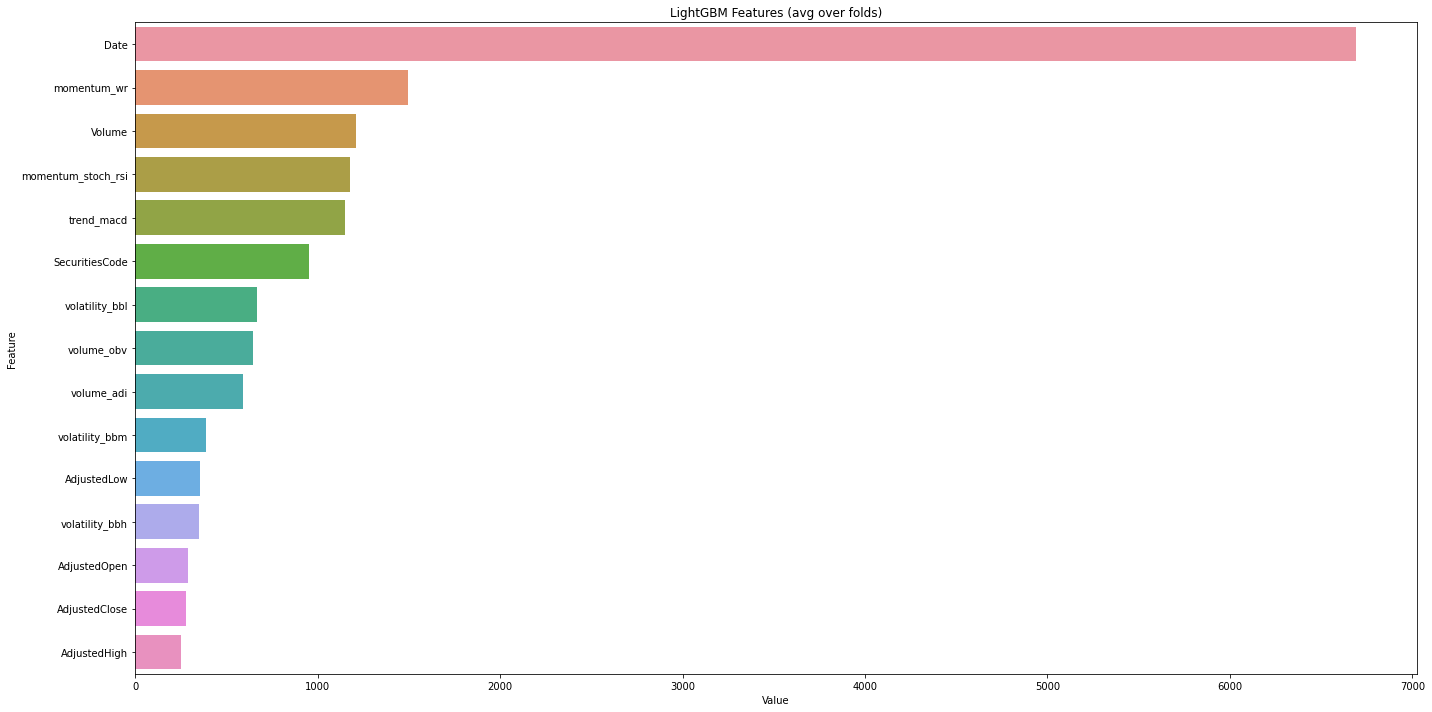

In [169]:
import seaborn as sns

feature_imp = pd.DataFrame(sorted(zip(clf.best_estimator_.named_steps['lgbmregressor'].feature_importances_,X_train.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances-01.png')
plt.show()



In [170]:
from sklearn.metrics import mean_squared_error
#y_test = test['Target']
#base_test = test['Base']

RMSE_pred = mean_squared_error(y_test, y_pred)**0.5
RMSE_base = mean_squared_error(y_test, base_test)**0.5

RMSE_pred, RMSE_base

(0.025223524513516418, 0.022755105167773456)

In [171]:
!pip install pdpbox

Processing c:\users\kbh\appdata\local\pip\cache\wheels\f4\d0\1a\b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb\pdpbox-0.2.1-py3-none-any.whl


ERROR: Could not install packages due to an EnvironmentError: [Errno 28] No space left on device



In [172]:
from pdpbox.pdp import pdp_isolate, pdp_plot

def my_plot_pdp(model, X_train, feature):
  isolated = pdp_isolate(
    model=clf, 
    dataset=X_train, 
    model_features=X_train.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
  )
  pdp_plot(isolated, feature_name=feature);

    
# 'Date',
# 'SecuritiesCode',
# 'Volume',
# 'AdjustmentFactor',
# 'ExpectedDividend',
# 'SupervisionFlag',
# 'AdjustedOpen',
# 'AdjustedClose',
# 'AdjustedHigh',
# 'AdjustedLow',
# 'volume_obv',   # 거래량지표1
# 'volume_adi' ,  # 거래량지표2
# 'momentum_stoch_rsi', #모멘텀지표
# 'momentum_wr',      #모멘텀지표
# 'trend_macd',      # 주세지표
# 'volatility_bbm' , #유동성지표
# 'volatility_bbh',
# 'volatility_bbl'    
    
#my_plot_pdp(model, X_train, 'Volume')
#my_plot_pdp(model, X_train, 'Volume')


ModuleNotFoundError: No module named 'pdpbox'

In [86]:
!pip install eli5

Processing c:\users\kbh\appdata\local\pip\cache\wheels\cc\3c\96\3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be\eli5-0.13.0-py2.py3-none-any.whl
  Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
  Using cached graphviz-0.20-py3-none-any.whl (46 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.2
    Uninstalling Jinja2-2.11.2:
      Successfully uninstalled Jinja2-2.11.2


ERROR: pandas-profiling 2.11.0 requires matplotlib>=3.2.0, which is not installed.
ERROR: jupyterlab 1.2.6 has requirement jupyterlab_server~=1.0.0, but you'll have jupyterlab-server 1.1.1 which is incompatible.


In [97]:
clf

RandomizedSearchCV(cv=<__main__.myTimeSeriesSplit object at 0x000001CA88507B08>,
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('simpleimputer',
                                              SimpleImputer(add_indicator=False,
                                                            copy=True,
                                                            fill_value=None,
                                                            missing_values=nan,
                                                            strategy='mean',
                                                            verbose=0)),
                                             ('standardscaler',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                   

In [89]:

import eli5
from eli5.sklearn import PermutationImportance
from eli5.sklearn import *
from eli5.permutation_importance import get_score_importances


perm = PermutationImportance(clf., random_state=1).fit(X_train ,y_train)
eli5.show_weights(perm, feature_names=X_train.columns.tolist())

KeyboardInterrupt: 

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [186]:
y_pred, y_test, base_test

a =  pd.DataFrame(y_pred)
b = pd.DataFrame(y_test)
c =  pd.DataFrame(base_test)

a.columns = ['Target']
b.columns = ['Target']
c.columns = ['Target']


pred = pd.concat([X_test, a], axis=1).reset_index()
test = pd.concat([X_test, b], axis=1).reset_index()
base = pd.concat([X_test, c], axis=1).reset_index()



## 7974 닌텐도
## 6758 소니
## 7203 토요타
## 9984 소프트뱅크


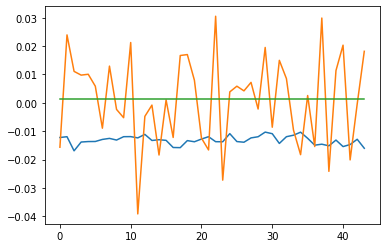

In [188]:

plt.plot( pred[pred['SecuritiesCode'] == 7974]['Date'].reset_index().index, pred[pred['SecuritiesCode'] == 7974]['Target'])
plt.plot( test[test['SecuritiesCode'] == 7974]['Date'].reset_index().index, test[test['SecuritiesCode'] == 7974]['Target'])
plt.plot( base[base['SecuritiesCode'] == 7974]['Date'].reset_index().index, base[base['SecuritiesCode'] == 7974]['Target'])

plt.show()

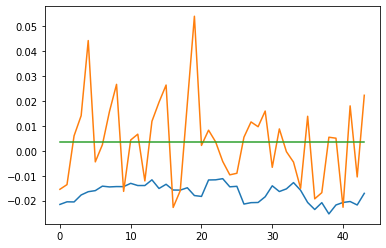

In [189]:
plt.plot( pred[pred['SecuritiesCode'] == 6758]['Date'].reset_index().index, pred[pred['SecuritiesCode'] == 6758]['Target'])
plt.plot( test[test['SecuritiesCode'] == 6758]['Date'].reset_index().index, test[test['SecuritiesCode'] == 6758]['Target'])
plt.plot( base[base['SecuritiesCode'] == 6758]['Date'].reset_index().index, base[base['SecuritiesCode'] == 6758]['Target'])

plt.show()

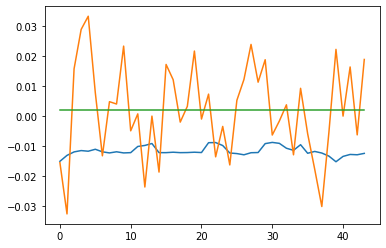

In [190]:
plt.plot( pred[pred['SecuritiesCode'] == 7203]['Date'].reset_index().index, pred[pred['SecuritiesCode'] == 7203]['Target'])
plt.plot( test[test['SecuritiesCode'] == 7203]['Date'].reset_index().index, test[test['SecuritiesCode'] == 7203]['Target'])
plt.plot( base[base['SecuritiesCode'] == 7203]['Date'].reset_index().index, base[base['SecuritiesCode'] == 7203]['Target'])

plt.show()

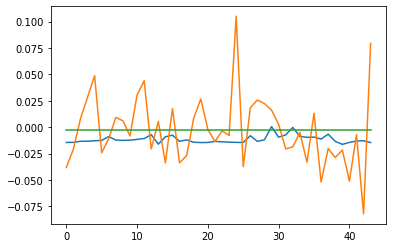

In [191]:
plt.plot( pred[pred['SecuritiesCode'] == 9984]['Date'].reset_index().index, pred[pred['SecuritiesCode'] == 9984]['Target'])
plt.plot( test[test['SecuritiesCode'] == 9984]['Date'].reset_index().index, test[test['SecuritiesCode'] == 9984]['Target'])
plt.plot( base[base['SecuritiesCode'] == 9984]['Date'].reset_index().index, base[base['SecuritiesCode'] == 9984]['Target'])

plt.show()